# **Resumen Estadística inferencial**
1.   Intérvalos de confianza
4.   Prueba de hipótesis
3.  Test Chi-cuadrado

#**Modelos predictivos**
1. Regresión lineal






#**Resumen Estadística inferencial**

Una de las partes más útiles de las estadísticas en la ciencia de datos son las pruebas estadísticas y las pruebas de hipótesis. Necesitamos saber cuál y cuándo usar una prueba estadística para que podamos tener las conclusiones apropiadas para una hipótesis.

Hay 3 pasos principales en la prueba de hipótesis:

* Indicar la hipótesis nula ($H_0$) y alternativa ($H_1$).
* Realizar una prueba estadística adecuada.
* Decida si se rechaza o no la hipótesis nula.
  Para ellos, debe establecer un umbral para el valor $p$ llamado valor alfa ($\alpha$). Si establecemos el valor alfa en 0.05, eso significa que tenemos un 95 % de confianza en el resultado. 

Para las siguientes pruebas estadísticas, el alfa se establece en 0.05.


Tenemos principalmente dos tipos de variables en el conjunto de datos "Birthweight_reduced_kg_R.csv". Las Variables Categóricas como "smoker" y las Numéricas como "Length" y "Gestation".


In [ ]:
%matplotlib inline

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import random
import math

In [ ]:
df = pd.read_csv("Birthweight_reduced_kg_R.csv")
df.head()

,ID,Length,Birthweight,Headcirc,Gestation,smoker,mage,mnocig,mheight,mppwt,fage,fedyrs,fnocig,fheight,lowbwt,mage35
0,1360,56,4.55,34,44,0,20,0,162,57,23,10,35,179,0,0
1,1016,53,4.32,36,40,0,19,0,171,62,19,12,0,183,0,0
2,462,58,4.10,39,41,0,35,0,172,58,31,16,25,185,0,1
3,1187,53,4.07,38,44,0,20,0,174,68,26,14,25,189,0,0
4,553,54,3.94,37,42,0,24,0,175,66,30,12,0,184,0,0


* ID: identificación del bebé
* length:	Longitud del bebé (cm)
* Birthweight:	Peso del bebé (kg)
* headcirumference:	circunferencia de la cabeza
* Gestation:	Gestación (semanas)
* smoker:	Mother smokes 1 = smoker 0 = non-smoker
* motherage: edad materna
* mnocig: Número de cigarrillos fumados por día por la madre
* mheight: Altura de la madre (cm)
* mppwt:	Peso de la madre antes del embarazo (kg)
* fage:	edad del padre
* fedyrs:	Años de educación del padre
* fnocig:	Número de cigarrillos fumados por día por el padre
* fheight:	Altura del padre (cm)
* lowbwt:	Bajo peso al nacer, 0 = No y 1 = sí
* mage35: Madre mayor de 35 años, 0 = No y 1 = sí

##**Prueba sobre dos variables categóricas**
Por ejemplo: ¿Difiere la proporción de fumadores y no fumadores entre los niños nacidos con bajo peso?

Si queremos comprobar la independencia de dos valores categóricos, utilizaremos la prueba Chi-Cuadrado.

Planteemos la hipótesis:

$H_0$ (Hipótesis nula): Las categorías "smoker" y "lowbwt" son **independientes**.

$H_1$ (hipótesis alternativa): Las categorías "smoker" y "lowbwt" son **dependientes**.


Para un valor de p y un nivel de significancia (alfa $\alpha$) elegido, la prueba se puede interpretar de la siguiente manera:

Si $p <= \alpha$: se rechaza la hipótesis nula ($H_0$) y se acepta la $H_1$ (hipótesis alternativa), esto significa que las dos variables categóricas están correlacionadas, son dependientes.

Si $p > \alpha$: acepta la hipótesis nula ($H_0$) y rechaza la $H_1$, esto significa que las dos variables categóricas no están correlacionadas, son independiente.


Para calcular la estadística de la prueba de Chi-cuadrado, necesitaríamos construir una **tabla de contingencia**, las cuales se emplean para registrar y analizar la asociación entre dos o más variables. Podemos hacerlo usando la función `pd.crosstab` de pandas:

In [ ]:
from scipy.stats import chi2_contingency
 
#La forma más fácil de aplicar una prueba de chi-cuadrado es usando una tabla de contingencia
 
contigency= pd.crosstab(df['smoker'], df['lowbwt'])
contigency

lowbwt,0,1
smoker,,
0,19,1
1,17,5


In [ ]:
#Chi-square test of independence.
stats.chi2_contingency(contigency)[0:3] # c, p, dof, expected
 


(1.4357954545454548, 0.23082094094618558, 1)

El valor de $p$ es superior a 0.05, por lo que no podemos rechazar la hipótesis nula con un nivel de confianza del 95 %. Eso significa que las categorías "smoker" y "lowbwt" son independientes. 

##**Prueba sobre una variable categórica y una numérica**
Ejemplo: ¿Hay alguna diferencia entre el periodo de gestación ("Gestation") y si la madre es fumadora ("smoker")? ¿Hay alguna diferencia entre el periodo de gestación ("Gestation") y las edad de la madre ("mage")?

En esta situación, utilizaremos una prueba T (students T-Test).

$H_0$: no hay diferencia

$H_1$: Hay una diferencia

*La prueba-T, prueba t de Student o Test-T es una prueba estadística utilizada para determinar si una muestra de datos numéricos difiere significativamente de la población o si dos muestras difieren entre sí.*


In [ ]:
from scipy.stats import ttest_ind
#¿Hay alguna diferencia entre el periodo de gestación ("Gestation") y si la madre es fumadora ("smoker")? 
 
t_stat, p = ttest_ind(df[(df.smoker == 1)]['Gestation'], df[(df.smoker == 0)]['Gestation'])
 
print("p_value: ",round(p,3))

p_value:  0.551


El valor de $p > 0.05$, por lo que aceptamos la hipótesis nula con un nivel de confianza del 95 %. Eso significa que NO hay una diferencia en la gestación entre mujeres fumadoras y no fumadoras.

In [ ]:
df[(df.smoker == 1)]['Gestation']

20    40
21    41
22    37
23    39
24    37
25    35
26    33
27    41
28    40
29    40
30    38
31    39
32    39
33    45
34    39
35    41
36    40
37    39
38    38
39    41
40    35
41    40
Name: Gestation, dtype: int64

In [ ]:
df[(df.smoker == 1)]['Gestation'].mean()

38.95454545454545

In [ ]:
df[(df.smoker == 0)]['Gestation'].mean()

39.45

In [ ]:
from scipy.stats import ttest_ind
 
#¿Hay alguna diferencia entre el periodo de gestación ("Gestation") y las edad de la madre ("mage35")?
 
t_stat, p = ttest_ind(df[(df.mage35 == 1)]['Gestation'], df[(df.mage35 == 0)]['Gestation'])
 
print("p_value: ",round(p,3))

p_value:  0.963


El valor $p > 0.05$, por lo que aceptamos la hipótesis nula con un nivel de confianza del 95 %. Eso significa que no hay una diferencia en la gestación con la edad de las mujeres.

#**Prueba sobre dos variables numéricas**
Ejemplo: ¿Existe una relación entre el peso del niño al nacer ("Birthweight") y la gestación ("Gestation")?

$H_0$: No hay relación entre el peso del niño al nacer y la gestación.

$H_1$: Existe una relación entre el peso del niño al nacer y la gestación.

Utilizaremos una prueba de correlación, la cual nos dará el coeficiente de correlación y el valor de p. Como se ha dicho en clases anteriores, el coeficiente de correlación es el número que nos indica qué tan relacionadas están las dos variables. Para el valor de $p$, aplicando los mismos principios que antes, si el valor de $p < 0.05$, rechazamos la hipótesis nula.

In [ ]:
import scipy.stats as stats
 
#Para este ejemplo usaremos la Correlación de Pearson.
pearson_coef, p_value = stats.pearsonr(df["Gestation"], df["Birthweight"])
 
print("El coeficiente de correlación de Pearson es: ", pearson_coef, "y un valor de p de:", round(p_value,3) )

El coeficiente de correlación de Pearson es:  0.7083028937020828 y un valor de p de: 0.0


Como podemos ver, el valor de $p < 0.05$, por lo que rechazamos la hipótesis nula con un nivel de confianza del 95 %. Eso significa que hay una relación entre la gestación y el peso.



Mientras que el coeficiente de Pearson y el coeficiente de rango de Spearman miden la fuerza de una asociación entre dos variables, la prueba de chi-cuadrado mide la significancia de la asociación entre dos variables. Lo que le dice es si es probable que la relación que encontró en la muestra exista en la población, o qué tan probable es que sea por casualidad debido a un error de muestreo.

Si usamos la prueba t para estas dos muestras, investigamos si las medias de dos muestras de datos independientes difieren entre sí. En una prueba de dos muestras numéricas, la hipótesis nula es que las medias de ambos grupos son iguales.  Para ello utilizamos la función `stats.ttest_ind()`. 


##**Prueba sobre una variable categórica**
Por ejemplo: *¿Hay alguna diferencia en el número de fumadores y no fumadores en la población?*

Para una sola variable categórica, queremos verificar si hay una diferencia entre el número de sus valores, usaremos una prueba Z de una proporción. 

Planteemos la hipótesis:

$H_0$: no hay diferencia entre el número de fumadores y no fumadores

$H_1$: hay una diferencia entre el número de fumadores y no fumadores

Estamos verificando si la proporción de fumadores $P_f$ es diferente a la de no fumadores $P_{nf}$. 

In [ ]:
Fumador = df["smoker"].value_counts()
Fumador

1    22
0    20
Name: smoker, dtype: int64

In [ ]:
from statsmodels.stats.proportion import proportions_ztest
 
count = 20 #número de fumadores 
nobs = 42 #número total de personas 
value = 0.5 # Este es el valor de la hipótesis nula. Eso significa proporción de fumadores = proporción de no fumadores = 0.5

stat, pval = proportions_ztest(count, nobs, value)
 
print("p_value: ", round(pval,3))

p_value:  0.757


Dado que el valor de $p$ no es menor que $\alpha = 0.05$, se acepta la hipótesis nula. Eso significa que no hay una diferencia en el número de fumadores y no fumadores en la población. 

#**Prueba sobre una variable categórica con más de dos valores y una variable numérica**

En este caso, se usa la prueba **ANOVA** (Análisis de varianza).

$H_0$: las medias de la variable numérica de los grupos dentro de la categoría son iguales.

$H_1$: Al menos, la media de la variable numérica de un grupo dentro de la categoría es diferente de los otros grupos.

```
import scipy.stats as stats
 
# stats f_oneway functions toma los grupos como entradas y retorna ANOVA F y el valor de p
fvalue, pvalue = stats.f_oneway(df[(Variable categóricca_1)]['Variable_Numérica'],
                                df[(Variable categóricca_2)]['Variable_Numérica'],
                                df[(Variable categóricca_3)]['Variable_Numérica'])
 
print("p_value: ",round(pvalue,3))

```



##**ANOVA unidireccional**
El ANOVA unidireccional prueba si la media de alguna variable numérica difiere entre los niveles de una variable categórica. Esencialmente responde a la pregunta: ¿alguna de las medias grupales difiere entre sí? No entraremos en los detalles de realizar un ANOVA a mano, ya que implica más cálculos que la prueba t, pero el proceso es similar: realiza varios cálculos para llegar a una estadística de prueba y luego compara la estadística de prueba a un valor crítico basado en una distribución de probabilidad. En el caso del ANOVA, se utiliza la "distribución f".

La biblioteca scipy tiene una función para realizar pruebas ANOVA unidireccionales llamada `scipy.stats.f_oneway()`. Generemos algunos datos demográficos y de edad de votantes falsos y usemos el ANOVA para comparar las edades promedio entre los grupos:

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

In [ ]:
np.random.seed(12)

races =   ["asian","black","hispanic","other","white"]

# Generate random data
voter_race = np.random.choice(a= races,
                              p = [0.05, 0.15 ,0.25, 0.05, 0.5],
                              size=1000)

voter_age = stats.poisson.rvs(loc=18,
                              mu=30,
                              size=1000)

# Group age data by race
voter_frame = pd.DataFrame({"race":voter_race,"age":voter_age})
groups = voter_frame.groupby("race").groups

# Etract individual groups
asian = voter_age[groups["asian"]]
black = voter_age[groups["black"]]
hispanic = voter_age[groups["hispanic"]]
other = voter_age[groups["other"]]
white = voter_age[groups["white"]]

# Perform the ANOVA
stats.f_oneway(asian, black, hispanic, other, white)

F_onewayResult(statistic=1.7744689357329695, pvalue=0.13173183201930463)

El resultado de la prueba arroja una estadística F de 1.774 y un valor p de 0.1317, lo que indica que no hay una diferencia significativa entre las medias de cada grupo.



#**Regresión lineal**

Aprendimos sobre técnicas de inferencia estadística, incluidas la prueba t, la prueba de chi-cuadrado y ANOVA, que le permiten analizar las diferencias entre las muestras de un conjunto de datos. El modelado predictivo, el uso de muestras de datos para hacer predicciones sobre datos no vistos, como datos que aún no se han generado, es otra tarea común de análisis de datos. El modelado predictivo es una forma de aprendizaje automático, que describe una de las maneras para automatizar el proceso de encontrar patrones en los datos.

##**Conceptos básicos de regresión lineal**
La regresión lineal es una técnica de modelado predictivo, la cual predice una variable dependiente o variable de respuesta (response variable) basada en una o más variables explicativas, independientes o regresoras (explanatory variables). El término "regresión" en el modelado predictivo generalmente se refiere a cualquier tarea de modelado que implique predecir un número real (a diferencia de la clasificación, que implica predecir una categoría o clase). El término "lineal" en el nombre de regresión lineal se refiere al hecho de que el método modela datos con una combinación lineal de las variables explicativas. Una combinación lineal es una expresión en la que una o más variables se escalan por un factor constante y se suman. En el caso de la regresión lineal con una sola variable explicativa, la combinación lineal utilizada en la regresión lineal se puede expresar como:

$$Y = \omega_0 + \omega_1 X$$

$$Variable\, dependiente = intercepto + constante ∗ Variable\, independiente$$

La regresión lineal en su forma más básica ajusta una línea recta a la variable de respuesta. El modelo está diseñado para ajustarse a una línea que minimiza el cuadrado de las diferencias (también llamadas errores o residuales). No entraremos en toda la matemática detrás de cómo el modelo realmente minimiza los errores cuadráticos, pero el resultado final es una línea destinada a dar el "mejor ajuste" a los datos. Dado que la regresión lineal ajusta los datos con una línea, es más eficaz en los casos en que la respuesta y la variable explicativa tienen una relación lineal.



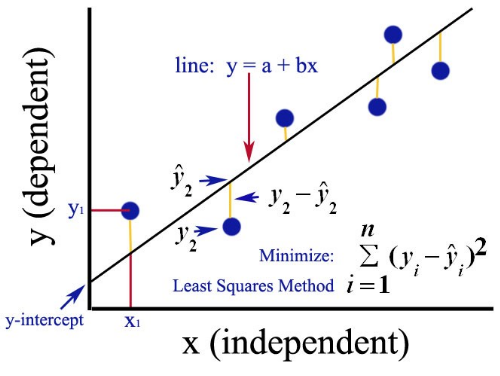

Revisemos el conjunto de datos "mtcars# y usemos la regresión lineal para predecir la cantidad millas por galón de gasolina del vehículo en función del peso del vehículo. Primero, carguemos algunas bibliotecas y observemos un diagrama de dispersión de las columnas "wt" y "mpg" para tener una idea de la forma de los datos:

In [ ]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import scipy.stats as stats
matplotlib.style.use('ggplot')

In [ ]:
mtcars = pd.read_csv("mtcars.csv")
mtcars.head()

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


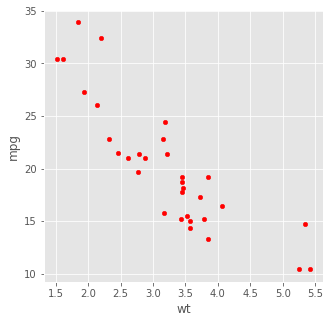

In [ ]:
mtcars = pd.read_csv("mtcars.csv")

mtcars.plot(kind="scatter", 
           x="wt",
           y="mpg",
           figsize=(5,5),
           color="red");

El gráfico de dispersión muestra una relación aproximadamente lineal entre el peso y las millas por galón, lo que sugiere que un modelo de regresión lineal podría funcionar bien.

La biblioteca scikit-learn de Python contiene una amplia gama de funciones para el modelado predictivo. Carguemos su función de entrenamiento de regresión lineal y ajustemos una línea a los datos de mtcars:

Usamos `linear_model.LinearRegression()`

In [ ]:
from sklearn import linear_model

In [ ]:
# Inicializar el modelo
regression_model = linear_model.LinearRegression()

# Entrena el modelo usando los datos de mtcars
regression_model.fit(X = pd.DataFrame(mtcars["wt"]), y = mtcars["mpg"])

# Verifique el intercepto en Y del modelo entrenado
print(regression_model.intercept_)

# Comprobar los coeficientes del modelo entrenado
print(regression_model.coef_)

37.28512616734204
[-5.34447157]


El resultado anterior muestra la intercepción del modelo y los coeficientes utilizados para crear la línea de mejor ajuste. En este caso, el término de intersección con el eje-y es 37.2851 y el coeficiente (pendiente de la línea) es -5.3445. En otras palabras, el modelo se ajusta a la línea:  

$$mpg = - 5,3445 * wt + 37,2851$$

Podemos tener una idea de qué tan cerca están los datos de la línea de ajuste usando la función `model.score()`:

In [ ]:
regression_model.score(X = pd.DataFrame(mtcars["wt"]), y = mtcars["mpg"])

0.7528327936582646

El resultado de la función score para la regresión lineal es "**R-cuadrado**", un valor que varía de 0 a 1 (0 y 100%) y que describe la proporción de la varianza en la variable de respuesta que explica el modelo; es decir:

0% indica que el modelo no explica ninguna porción de la variabilidad de los datos de respuesta en torno a su media.

100% indica que el modelo explica toda la variabilidad de los datos de respuesta en torno a su media.

*En este caso, el peso del automóvil explica aproximadamente el 75% de la variación en mpg.* 

Algunas limitacones con el R-cuadrado es que este no puede determinar si las estimaciones y predicciones de los coeficientes están sesgadas, y es por eso que se deben examinar los residuos. Por otra parte, el R-cuadrado no indica si un modelo de regresión es adecuado. Se puede tener un valor bajo del R-cuadrado para un modelo adecuado o un valor alto del R-cuadrado para un modelo que no se ajusta a los datos.


La medida R-cuadrado se basa en los residuos: diferencias entre lo que predice el modelo para cada punto de datos y el valor real de cada punto de datos. Podemos extraer los residuos del modelo haciendo una predicción con el modelo sobre los datos y luego restando el valor real de cada predicción:

In [ ]:
train_prediction = regression_model.predict(X = pd.DataFrame(mtcars["wt"]))
# Residuales = Actual - Predicción  
residuals = mtcars["mpg"] - train_prediction

residuals.describe()

count    3.200000e+01
mean    -8.215650e-15
std      2.996352e+00
min     -4.543151e+00
25%     -2.364709e+00
50%     -1.251956e-01
75%      1.409561e+00
max      6.872711e+00
Name: mpg, dtype: float64

El R-cuadrado (R-squared) se calcula como:

$$R-squared =  1 - \frac{SSResiduals}{SSTotal}$$ 

donde $SSResiduals$ es la suma de los cuadrados de los residuos del modelo y $SSTotal$ es la suma de los cuadrados de la diferencia entre cada punto de datos y la media de los datos. 

Podríamos calcular R-cuadrado a mano así:

$$R^2 = 1-\frac{\sum{(y_j-\hat{y}_j)^2}}{\sum{(y_j-\overline{y})^2}}$$

In [ ]:
SSResiduals = (residuals**2).sum()

SSTotal = ((mtcars["mpg"] - mtcars["mpg"].mean())**2).sum()

# R-squared
1 - (SSResiduals/SSTotal)

0.7528327936582646

Ahora que tenemos un modelo lineal, tracemos la línea que encaja en nuestro diagrama de dispersión para tener una idea de qué tan bien se ajusta a los datos:

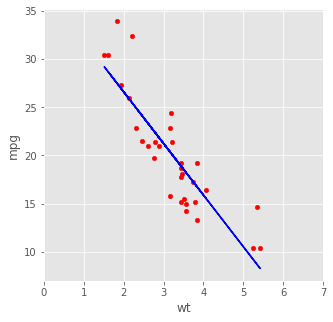

In [ ]:
mtcars.plot(kind="scatter", x="wt", y="mpg", figsize=(5,5), color="red", xlim = (0,7))

# Plot línea de ajuste
plt.plot(mtcars["wt"],      # Variable explicativa
         train_prediction,  # Valores predictivos
         color="blue");

La línea de regresión parece un ajuste razonable y sigue nuestra intuición: a medida que aumenta el peso del automóvil, esperaríamos que la economía de combustible disminuya.

**¿Qué sucede con los valores atípicos?**

Los valores atípicos pueden tener una gran influencia en los modelos de regresión lineal, dado que la regresión trata de minimizar los residuos al cuadrado, los residuos grandes tienen una influencia desproporcionadamente grande en el modelo. Graficar el resultado nos ayuda a detectar valores atípicos influyentes. En este caso, no parece haber valores atípicos influyentes. Agreguemos un valor atípico, un automóvil súper pesado que ahorra combustible, y tracemos un nuevo modelo de regresión:

In [ ]:
mtcars_subset = mtcars[["mpg","wt"]]

super_car = pd.DataFrame({"mpg":50,"wt":10}, index=["super"])

new_cars = mtcars_subset.append(super_car) # Explanatory variable 
new_cars

 
      
         

,mpg,wt
0,21.0,2.620
1,21.0,2.875
2,22.8,2.320
3,21.4,3.215
4,18.7,3.440
5,18.1,3.460
6,14.3,3.570
7,24.4,3.190
8,22.8,3.150
9,19.2,3.440


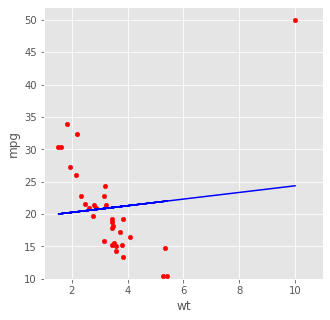

In [ ]:


# Inicializar el modelo
regression_model = linear_model.LinearRegression()

# Entrenar el modelo usando los datos new_cars
regression_model.fit(X = pd.DataFrame(new_cars["wt"]), y = new_cars["mpg"])

train_prediction2 = regression_model.predict(X = pd.DataFrame(new_cars["wt"])) # Predicted values

# Plot Nuevo modelo
new_cars.plot(kind="scatter", x="wt", y="mpg", figsize=(5,5), color="red", xlim=(1,11), ylim=(10,52))

# Plot Línea de regresión
plt.plot(new_cars["wt"], train_prediction2, color="blue"); 

Aunque este es un caso extremo e inventado, la gráfica anterior ilustra cuánta influencia puede tener un solo valor atípico en un modelo de regresión lineal.

En un modelo de regresión lineal de buen comportamiento, nos gustaría que los residuos se distribuyeran aproximadamente de forma normal. Es decir, nos gustaría una distribución del error más o menos uniforme por encima y por debajo de la línea de regresión. Podemos investigar la normalidad de los residuos con una gráfica Q-Q (cuantil-cuantil). Hagamos un qqplot pasando los residuos a la función `stats.probplot()` en la biblioteca scipy.stats:

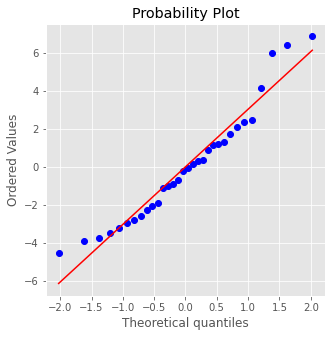

In [ ]:
plt.figure(figsize=(5,5))

stats.probplot(residuals, dist="norm", plot=plt);

Otra forma, y la cual vimos en la clase anterior es usando *qqplot*.

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


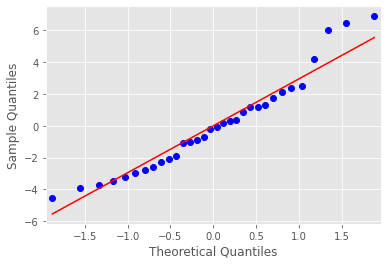

In [ ]:
from statsmodels.graphics.gofplots import qqplot

distribucion_generada = residuals
# Represento el Q-Q plot
qqplot(distribucion_generada , line='s')
plt.show()


Cuando los residuos se distribuyen normalmente, tienden a estar a lo largo de la línea recta en el gráfico Q-Q. En este caso, los residuales parecen seguir un patrón ligeramente no lineal: los residuales se arquean un poco alejándose de la línea de normalidad en cada extremo. Esta es una indicación de que una simple línea recta podría no ser suficiente para describir completamente la relación entre peso y mpg.

Después de hacer las predicciones del modelo, es útil tener algún tipo de métrica para evaluar el rendimiento del modelo. El R cuadrado ajustado es una medida útil, pero solo se aplica al modelo de regresión en sí mismo: nos gustaría alguna métrica de evaluación universal que nos permita comparar el rendimiento de diferentes tipos de modelos. El error cuadrático medio (**RMSE**) es una métrica de evaluación común para predicciones que involucran números reales. La raíz del error cuadrático medio es la raíz cuadrada del promedio del error cuadrático (residuales). 

$$RMSE = \sqrt{\frac{1}{n}\sum_{j=1}^n(y_j - \hat{y}_j)^2}$$

In [ ]:
def rmse(predicted, targets):
    """
    Calcula la raíz del error cuadrático medio de dos arrays 
    
     Argumentos:
         predicted: una serie de predicciones
         targets: array de valores objetivo
    
     Returns:
         El error cuadrático medio de la raíz como un float
    """
    return (np.sqrt(np.mean((targets-predicted)**2)))

rmse(train_prediction, mtcars["mpg"])

2.949162685955028

En lugar de definir su propia función RMSE, puede usar la función de error cuadrático medio de la biblioteca scikit-learn y sacar la raíz cuadrada del resultado:

In [ ]:
from sklearn.metrics import mean_squared_error

RMSE = mean_squared_error(train_prediction, mtcars["mpg"])**0.5

RMSE

2.949162685955028

#**Regresión polinomial**
Las variables a menudo exhiben relaciones no lineales que no pueden ajustarse bien con una línea recta. En estos casos, podemos usar la regresión lineal para ajustar una línea curva a los datos agregando términos adicionales de orden superior (cuadrado, cúbico, etc.) al modelo. Una regresión lineal que involucra términos de orden superior se conoce como "regresión polinomial".

$$Y=\omega _{0}+\omega _{1}X+\omega _{2}X^{2}+...$$

In [ ]:
# Inicializa el modelo
poly_model = linear_model.LinearRegression()


# DataFrame de variables predictoras
predictors = pd.DataFrame([mtcars["wt"],           # Include weight
                           mtcars["wt"]**2]).T    # Include weight squared

poly_model.fit(X = predictors, y = mtcars["mpg"])

# Verifica el y-intercepto del modelo de entrenamiento
print("Intercepto del modelo:", poly_model.intercept_)

# Verifique los coeficientes del modelo entrenado (factor de escala dado a "wt")
print("Coefficientes del modelo:", poly_model.coef_)

# Verifica el R-squared
print("Precisión del modelo:")
print(poly_model.score(X = predictors, y = mtcars["mpg"]))

Intercepto del modelo: 49.93081094945181
Coefficientes del modelo: [-13.38033708   1.17108689]
Precisión del modelo:
0.8190613581384095


El resultado nos muestra que incluir el término de peso al cuadrado parece mejorar el rendimiento del modelo porque el R-cuadrado aumentó de 0.75 a 0.8190. Sin embargo, debe tenerse en cuenta que agregar más variables a un modelo de regresión lineal nunca puede hacer que R-squared disminuya, por lo que solo queremos agregar variables si hay una mejora sustancial en el rendimiento.

Tracemos la línea de ajuste definida por el nuevo modelo, para ver si el ajuste se ve mejor que el anterior. Para comenzar, creemos una función que tome una matriz de valores de *x*, coeficientes del modelo y un término de intersección y devuelva los valores de *x* y los valores de *y* ajustados correspondientes a esos valores de *x*.

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


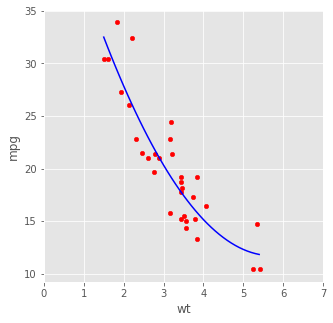

In [ ]:
# Grafique la curva desde 1.5 a 5.5
poly_line_range = np.arange(1.5, 5.5, 0.1)

# Obtiene los predictores de primer y segundo orden desde el rango dado
poly_predictors = pd.DataFrame([poly_line_range,  poly_line_range**2]).T

# Obtiene los valores y correspondientes del modelo
y_values = poly_model.predict(X = poly_predictors)

mtcars.plot(kind="scatter", x="wt", y="mpg", figsize=(5,5), color="red", xlim = (0,7))

# Grafica la línea curva
plt.plot(poly_line_range,   # rango eje-x
         y_values,          # Valores predictivos
         color="blue");

La función cuadrática parece ajustarse a los datos un poco mejor que la lineal. Investiguemos más a fondo utilizando el nuevo modelo para hacer predicciones sobre los datos originales y comprobar el error cuadrático medio:

In [ ]:
preds = poly_model.predict(X=predictors)

rmse(preds , mtcars["mpg"])

2.137090046275695

Dado que el RMSE del modelo cuadrático es más bajo que el anterior y el R-cuadrado ajustado es más alto, probablemente sea un mejor modelo. Sin embargo, debemos tener cuidado con el sobreajuste de los datos de entrenamiento.

El sobreajuste describe una situación en la que nuestro modelo se ajusta demasiado a los datos que usamos para crearlo (datos de entrenamiento), lo que da como resultado una mala generalización a nuevos datos. Esta es la razón por la que generalmente no queremos usar datos de entrenamiento para evaluar un modelo: nos da una evaluación sesgada, generalmente demasiado optimista. Uno de los puntos fuertes de la regresión lineal de primer y segundo orden es que son tan simples que es poco probable que sobreajusten demasiado los datos. Cuanto más complejo es el modelo que creamos y más libertad tiene para ajustarse a los datos de entrenamiento, mayor riesgo corremos de sobreajuste. Por ejemplo, podríamos seguir incluyendo más términos polinómicos en nuestro modelo de regresión para ajustar mejor los datos de entrenamiento y lograr puntajes RMSE más bajos en comparación con el conjunto de entrenamiento, pero es casi seguro que esto no se generalizaría bien a los datos nuevos. Ilustremos este punto ajustando un modelo de décimo orden a los datos de mtcars:

In [ ]:
# Inicializa el modelo
poly_model = linear_model.LinearRegression()

# Make a DataFrame of predictor variables
predictors = pd.DataFrame([mtcars["wt"],           
                           mtcars["wt"]**2,
                           mtcars["wt"]**3,
                           mtcars["wt"]**4,
                           mtcars["wt"]**5,
                           mtcars["wt"]**6,
                           mtcars["wt"]**7,
                           mtcars["wt"]**8,
                           mtcars["wt"]**9,
                           mtcars["wt"]**10]).T     

# Entrena el model using los datos de new_cars
poly_model.fit(X = predictors, 
               y = mtcars["mpg"])

# Verifica el y-intercepto del modelo de entrenamiento 
print("Intercepto del modelo:", poly_model.intercept_)

# Verifica los oeficientes del modelo de entrenamiento (factor de escala dado para "wt")
print("Coeficientes del modelo:", poly_model.coef_)

# R-squared
print("R-cuadrado:")
poly_model.score(X = predictors,  y = mtcars["mpg"])


Intercepto del modelo: -14921.120533981546
Coeficientes del modelo: [ 6.45813566e+04 -1.20086131e+05  1.26931928e+05 -8.46598453e+04
  3.73155198e+04 -1.10334755e+04  2.16590404e+03 -2.70730544e+02
  1.94974162e+01 -6.15515436e-01]
R-cuadrado:


0.870210657838439

Observe que el R-cuadrado ha aumentado sustancialmente desde nuestro modelo cuadrático. Tracemos la línea de mejor ajuste para investigar qué está haciendo el modelo:

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


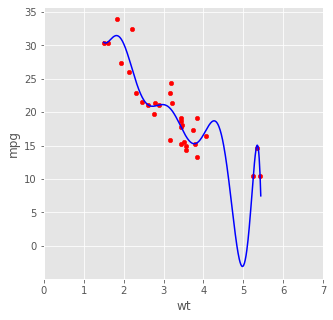

In [ ]:
p_range = np.arange(1.5, 5.45, 0.01)  # rango eje-x

poly_predictors = pd.DataFrame([p_range, p_range**2, p_range**3,
                              p_range**4, p_range**5, p_range**6, p_range**7, 
                              p_range**8, p_range**9, p_range**10]).T  

# Obtiene los valores de y correspondientes desde el modelo
y_values = poly_model.predict(X = poly_predictors) #Valores predictivos

mtcars.plot(kind="scatter", x="wt", y="mpg", figsize=(5,5), color="red", xlim = (0,7))

# Grafica la línea de ajuste
plt.plot(p_range, y_values, color="blue");

Observe cómo el modelo polinomial de décimo orden se curva mucho en algunos lugares para ajustarse a los datos de entrenamiento. Si bien este modelo se ajusta más a los datos de entrenamiento, es casi seguro que no se generalizará bien a los nuevos datos, ya que conduce a predicciones absurdas, como valores negativos para "mpg".

#**Regresión lineal múltiple**
Cuando se enfrente a una tarea de modelado predictivo, a menudo tendrá varias variables en sus datos que pueden ayudar a explicar la variación en la variable de respuesta. Puede incluir más variables explicativas ($X_1, X_2, ...,X_n$) en un modelo de regresión lineal al incluir más columnas en el marco de datos que pasa a la función de entrenamiento del modelo. Hagamos un nuevo modelo que agregue la variable de caballos de fuerza a nuestro modelo original:

$$Y=\omega _{0}+\omega _{1}X_1+\omega _{2}X_{2}+\omega _{3}X_{3}+\cdots +\omega _{n}X_{n}$$

In [ ]:
# Inicializar el modelo
multi_reg_model = linear_model.LinearRegression()

# Entrena el model using los datos de mtcars
multi_reg_model.fit(X = mtcars.loc[:,["wt","hp"]], 
                     y = mtcars["mpg"])

# Verifica el y-intercepto del modelo de entrenamiento 
print("Intercepto del modelo:", multi_reg_model.intercept_)

# Verifica los oeficientes del modelo de entrenamiento (factor de escala dado para "wt")
print("Coefficientes del modelo:", multi_reg_model.coef_)

# Verifica el R-cuadrado
print("R-cuadrado:")
multi_reg_model.score(X = mtcars.loc[:,["wt","hp"]],  y = mtcars["mpg"])

Intercepto del modelo: 37.22727011644721
Coefficientes del modelo: [-3.87783074 -0.03177295]
R-cuadrado:


0.8267854518827915

El R-cuadrado mejorado sugiere que la potencia tiene una relación lineal con el mpg. Investiguemos con un dibujo:

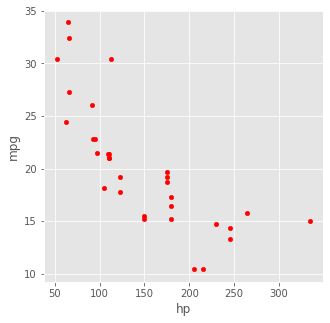

In [ ]:
mtcars.plot(kind="scatter", x="hp", y="mpg", figsize=(5,5), color="red");

In [ ]:
# Inicializa el modelo
multi_reg_model = linear_model.LinearRegression()

# Términos al cuadrado incluídos
poly_predictors = pd.DataFrame([mtcars["wt"],
                                mtcars["hp"],
                                mtcars["wt"]**2,
                                mtcars["hp"]**2]).T

# Entrena el modelo usando los datos de mtcars
multi_reg_model.fit(X = poly_predictors,  y = mtcars["mpg"])

# R-cuadrado
print("R-Squared")
print( multi_reg_model.score(X = poly_predictors ,  y = mtcars["mpg"]) )

# RMSE
print("RMSE")
print(rmse(multi_reg_model.predict(poly_predictors),mtcars["mpg"]))

R-Squared
0.8907279549670641
RMSE
1.9609108134176982


El nuevo R-cuadrado y el RMSE más bajo sugieren que este es un mejor modelo que cualquier otro que hayamos hecho anteriormente y no nos preocuparía demasiado el sobreajuste, ya que solo incluye 2 variables y 2 términos al cuadrado. Tenga en cuenta que cuando se trabaja con modelos multidimensionales, se vuelve difícil visualizar los resultados, por lo que depende en gran medida de la salida numérica.

Podríamos seguir agregando más variables explicativas en un intento de mejorar el modelo. Agregar variables que tienen poca relación con la respuesta o incluir variables que están demasiado relacionadas entre sí puede afectar los resultados cuando se utiliza la regresión lineal. También debe tener cuidado con las variables numéricas que toman pocos valores únicos, ya que pueden actuar más como variables categóricas que numéricas.


La regresión lineal es una de las técnicas más comunes para hacer predicciones con números reales a partir de datos. Es un buen lugar para comenzar cada vez que necesite hacer una predicción numérica. 

Teniendo en cuenta el dataset "Birthweight_reduced_kg_R.csv":

1. **Regresión simple**: ¿Puede la altura de la madre predecir la longitud del bebé? ¿Puede la edad gestacional predecir el peso del bebé?
2. **Regresión múltiple**: Cualquier combinación de variables para predecir la longitud del bebé. Después de controlar la edad gestacional, ¿el peso de la madre antes del embarazo tiene un efecto sobre el peso del bebé al nacer?

[1] Peter Bruce and Andrew Bruce (2017). Practical Statistics for Data Scientists. 50 Essential Concepts. y O’Reilly Media, Inc.

[2] https://www.kaggle.com/hamelg/python-for-data-analysis-index

[3] https://predictivehacks.com/how-to-choose-and-apply-the-right-statistical-test-in-python/
